In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
X,y = mnist['data'],mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
import numpy as np
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28,28)

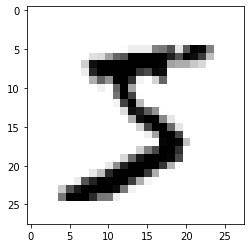

In [7]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = 'nearest')


In [8]:
y[0]

'5'

5 was in string, typecast it into integer

In [9]:
y = y.astype(np.int8)

In [10]:
def plot_digits(instances,images_per_row):
    size = 28
#     n_rows = ceil(len(instances)/images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    
#     Append empty images at the end if num of instances is over
    n_empty_spaces = n_rows*images_per_row - len(instances)
    padded_instances = np.concatenate([instances,np.zeros((n_empty_spaces,size*size))],axis = 0)
    
#     Reshape the array so that its in 28 * 28 images
    image_grid = padded_instances.reshape((n_rows,images_per_row,size,size))
    
    print(image_grid.shape)
    
    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = matplotlib.cm.binary)
    plt.axis("off")

(11, 10, 28, 28)


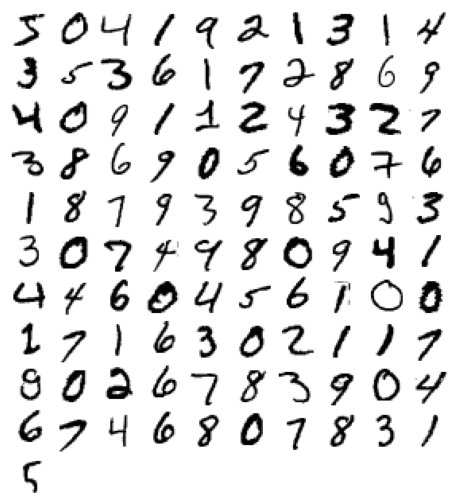

In [11]:
plt.figure(figsize=(9,9))
example_images = X.loc[:100]
plot_digits(example_images, images_per_row=10)
plt.savefig("more_digits_plot")
plt.show()

In [12]:
np.zeros((8,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [13]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],X[60000:]

In [14]:
#  5 detector
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [15]:
import warnings
FutureWarning('ignore')

FutureWarning('ignore')

ytrain5 and 5 ytest5 is an array of true and false

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1)
clf.fit(X_train,y_train_5)

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [17]:
clf.predict([some_digit])
# since our model is 5 detector it will return either this number is 5 or not

array([ True])

In [18]:
clf.predict([X.iloc[5]])

array([False])

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train_5,cv = 3,scoring='accuracy')

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

array([0.97525, 0.97325, 0.9732 ])

In [20]:
from sklearn.base import BaseEstimator
class not5(BaseEstimator):
    def fit(self,X,y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)

In [21]:
not_5_clf = not5()
cross_val_score(not_5_clf,X_train,y_train_5,cv = 3,scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [22]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,X_train,y_train_5,cv = 3)
# y_train_pred is also an array of true and false as model will be trained like that

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [23]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

as we can see y_train_pred is an array containing true and false
we need to compare it with y_train_5 in confusion matrix 

In [24]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_train_5,y_train_pred)
con_matrix

array([[54039,   540],
       [ 1026,  4395]], dtype=int64)

54039 correctly guessed as not 5(true negatives)

540 wrongly guessed as 5 but they were not (false positives)

1026  classified as not 5 but they were 5 (false negatives)

4395 correctly classified as 5 (true positives)

. A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diago‐
nal (top left to bottom right):

In [25]:
import pandas as pd
cm = pd.DataFrame({'Guessed Not 5 negatives':con_matrix[:,0],'Guessed 5 positives':con_matrix[:,1]},index=['Not 5','5'])
cm

,Guessed Not 5 negatives,Guessed 5 positives
Not 5,54039,540
5,1026,4395


In [26]:
# for example
y_train_5_copy = y_train_5
confusion_matrix(y_train_5_copy,y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Precision = TP/TP+FP
Recall = TP/TP+FN

In [27]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,y_train_pred))  # 4395 / 4395+540
print(recall_score(y_train_5,y_train_pred))   # 4395 / 4395+1026

0.8905775075987842
0.8107360265633647


In [28]:
# f1score is harmonic mean of precision score and recall score
from sklearn.metrics import f1_score
print(f1_score(y_train_5,y_train_pred))

0.8487833140208575


In [29]:
y_scores = clf.decision_function([some_digit])

In [30]:
y_scores

array([1.93837101])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
threshold = 80
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually repre‐
sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 80.

In [33]:
y_scores = cross_val_predict(clf,X_train,y_train_5,cv = 3,method = 'decision_function')

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [34]:
print(y_scores)
print(y_train_5)
print(y_scores.shape)
print(y_train_5.shape)

[  2.42505796  -9.0403714  -14.60160333 ...   4.36550078  -5.21413768
  -5.47747624]
0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool
(60000,)
(60000,)


In [35]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

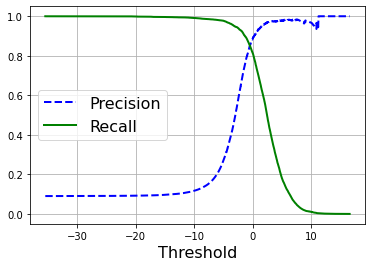

In [36]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(fontsize=16) # Not shown in the book
plt.xlabel("Threshold", fontsize=16)        # Not shown
plt.grid(True)                              # Not shown
# plt.axis([-50000, 50000, 0, 1])  

NameError: name 'recall_for_precision_90' is not defined

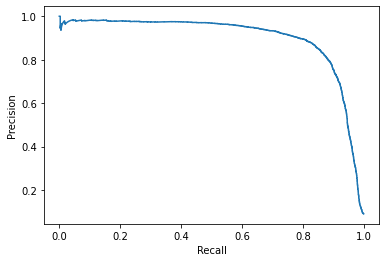

In [37]:
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot([recall_for_precision_90, recall_for_precision_90], [0., 0.9], "r:")
# ([0.78,0.78],[0,0.9])
plt.plot([0.0, recall_for_precision_90], [0.9, 0.9], "r:")
plt.plot(recall_for_precision_90,[0.9],'ro')
plt.grid('on')

In [ ]:
threshold_for_precision_90 = thresholds[np.argmax(precisions>=0.90)]
recall_for_precision_90 = recalls[np.argmax(precisions>=0.90)]
print(threshold_for_precision_90)
print(recall_for_precision_90)

In [ ]:
# y_train_pred_5
y_train_pred_90 = (y_scores>=threshold_for_precision_90)

In [ ]:
precision_score(y_train_5,y_train_pred_90)

In [ ]:
recall_score(y_train_5,y_train_pred_90)

 As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold, and
you’re done

A high-precision classifier is not very useful if its 
recall is too low!

# ROC Curve

ROC curve plots true positive rate vs false positive rate

plot the ROC curve, you first need to compute the TPR and FPR for various thres‐
hold values, using the roc_curve() function

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)


In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
# fpr for 90 precision
fpr_90 = fpr[np.argmax(tpr>=recall_for_precision_90)]             # tpr and recall are same thing
print(fpr_90)
plt.plot([fpr_90,fpr_90],[0.,recall_for_precision_90],'r:')
# plt.plot([0.0, fpr_90], [recall_for_precision_90, recall_for_precision_90], "r:")  
plt.plot([fpr_90], [recall_for_precision_90], "ro")               
plt.savefig("roc_curve_plot")                                    
plt.show()

# for plt.plot([a,b],[c,d])
# line joins points (a,c) and (b,d)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv = 3,method='predict_proba')

# for roc curve we will need scores and not propability so use probability of positive class as score
y_score_forest = y_probas_forest[:,1]
print(y_probas_forest)
print(y_score_forest)

first column is probability of being not 5 and second column has probability of being 5

In [ ]:
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_score_forest)


In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="Logistic model")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_for_precision_90], "r:")
plt.plot([0.0, fpr_90], [recall_for_precision_90, recall_for_precision_90], "r:")
plt.plot([fpr_90], [recall_for_precision_90], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.savefig("roc_curve_comparison_plot")
plt.show()

In [ ]:
roc_auc_score(y_train_5,y_score_forest)

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

In [ ]:
recall_score(y_train_5, y_train_pred_forest)